[View in Colaboratory](https://colab.research.google.com/github/karawalla/deeplearning/blob/master/MultiClassMLP.ipynb)

In [0]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
import numpy as np
from keras.models import Sequential
from keras.layers import Dense


(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 1us/step


In [0]:
def decode(data):
  work_index = reuters.get_word_index()
  reverse_idx = dict([(key, value) for (value, key) in work_index.items()])
  decoded_data = ' '.join([reverse_idx.get(item - 3, '?') for item in data])
  return decoded_data


def vectorize(data, dimension=10000):
  results = np.zeros((len(data), dimension))
  for (i, item) in enumerate(data):
    results[i, item] = 1.
    
  return results

In [0]:
decode(train_data[0])
train_labels[1]

557056/550378 [==============================] - 1s 2us/step


4

In [0]:
x_train = vectorize(train_data)
x_test= vectorize(test_data)


y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


In [0]:
y_train[0]

print(x_train.shape)

(8982, 10000)


In [0]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

split_x_train = x_train[1000:]
split_y_train = y_train[1000:]

x_val = x_train[:1000]
y_val = y_train[:1000]




history = model.fit(split_x_train,split_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 133us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7208 - val_acc: 0.6120
Epoch 2/8
7982/7982 [==============================] - 1s 79us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3459 - val_acc: 0.7060
Epoch 3/8
7982/7982 [==============================] - 1s 78us/step - loss: 1.0953 - acc: 0.7651 - val_loss: 1.1708 - val_acc: 0.7430
Epoch 4/8
7982/7982 [==============================] - 1s 79us/step - loss: 0.8697 - acc: 0.8165 - val_loss: 1.0793 - val_acc: 0.7590
Epoch 5/8
7982/7982 [==============================] - 1s 79us/step - loss: 0.7034 - acc: 0.8472 - val_loss: 0.9844 - val_acc: 0.7810
Epoch 6/8
7982/7982 [==============================] - 1s 78us/step - loss: 0.5667 - acc: 0.8802 - val_loss: 0.9411 - val_acc: 0.8040
Epoch 7/8
7982/7982 [==============================] - 1s 79us/step - loss: 0.4581 - acc: 0.9048 - val_loss: 0.9083 - val_acc: 0.8020
Epoch 8/8
798

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

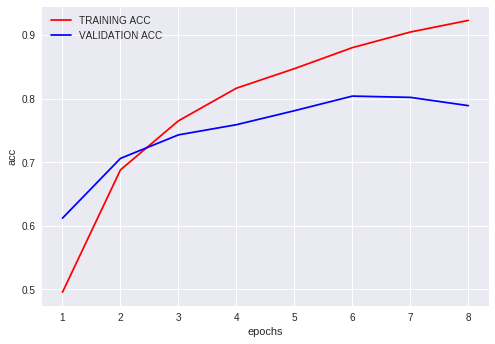

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['acc']
loss = history_dict['loss']


val_acc = history_dict['val_acc']
val_loss = history_dict['val_loss']

epochs = range(1, 1 + len(acc))


plt.plot(epochs, acc, 'r', label="TRAINING ACC")
plt.plot(epochs, val_acc, 'b', label="VALIDATION ACC")
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acc')
plt.show()




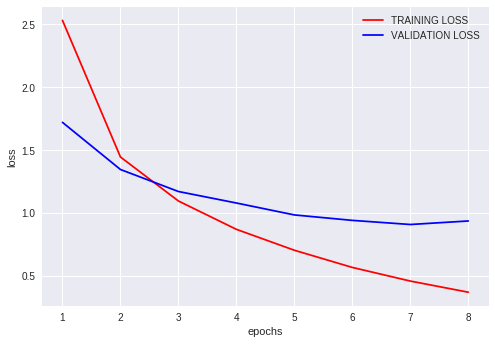

In [0]:
plt.clf()
plt.plot(epochs, loss, 'r', label="TRAINING LOSS")
plt.plot(epochs, val_loss, 'b', label="VALIDATION LOSS")
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [0]:
results = model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 151us/step


In [0]:
results


[0.9956972860164761, 0.7778272484947504]

In [0]:
#random method 

import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels_copy) == np.array(test_labels)
print(hits_array)

[False False False ... False  True False]


In [0]:
float(np.sum(hits_array))/len(y_test)

0.1834372217275156

In [0]:
predictions = model.predict(x_test)

In [0]:
predictions[0]

array([6.7318438e-06, 1.6811276e-04, 2.5684369e-06, 9.2600089e-01,
       6.5628894e-02, 2.3388272e-06, 1.7465873e-05, 3.7176509e-05,
       1.4703175e-03, 1.9424808e-05, 1.8392327e-04, 2.3011249e-04,
       1.4575430e-04, 5.5328496e-06, 1.2737399e-05, 8.4976346e-06,
       1.5128698e-03, 1.2125891e-04, 7.5294171e-05, 7.5462321e-04,
       2.1643455e-03, 2.8483797e-04, 4.9818332e-06, 6.6598400e-06,
       1.1244378e-04, 1.1756331e-05, 8.4703157e-07, 1.8163590e-05,
       1.7772663e-04, 2.1257634e-05, 2.6330800e-04, 2.4186164e-05,
       7.7051278e-05, 4.7547687e-06, 2.0901929e-04, 7.2154121e-06,
       4.0080406e-05, 1.4407565e-05, 4.5839355e-05, 2.6767737e-05,
       1.5330559e-05, 2.9207908e-05, 2.4989280e-05, 2.1234689e-06,
       7.6247020e-06, 4.6750540e-07], dtype=float32)

In [0]:
np.argmax(predictions[-1])

1

In [0]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [0]:
test_labels[-1]

24

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [0]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25])

In [0]:
model.compile(optimizer='rmsprop', loss="sparse_categorical_crossentropy", metrics=['acc'])

split_x_train = x_train[1000:]
split_y_train = y_train[1000:]

x_val = x_train[:1000]
y_val = y_train[:1000]




history = model.fit(split_x_train,split_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 98us/step - loss: 0.3261 - acc: 0.9281 - val_loss: 0.9041 - val_acc: 0.8120
Epoch 2/8
7982/7982 [==============================] - 1s 77us/step - loss: 0.2424 - acc: 0.9453 - val_loss: 0.9149 - val_acc: 0.8050
Epoch 3/8
7982/7982 [==============================] - 1s 79us/step - loss: 0.2077 - acc: 0.9491 - val_loss: 0.9138 - val_acc: 0.8180
Epoch 4/8
7982/7982 [==============================] - 1s 76us/step - loss: 0.1807 - acc: 0.9516 - val_loss: 0.9242 - val_acc: 0.8260
Epoch 5/8
7982/7982 [==============================] - 1s 77us/step - loss: 0.1641 - acc: 0.9526 - val_loss: 0.9793 - val_acc: 0.8110
Epoch 6/8
7982/7982 [==============================] - 1s 78us/step - loss: 0.1490 - acc: 0.9538 - val_loss: 0.9579 - val_acc: 0.8100
Epoch 7/8
7982/7982 [==============================] - 1s 77us/step - loss: 0.1352 - acc: 0.9570 - val_loss: 0.9873 - val_acc: 0.8160
Epoch 8/8
7982

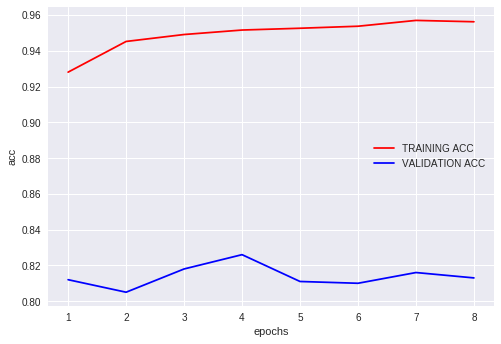

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['acc']
loss = history_dict['loss']


val_acc = history_dict['val_acc']
val_loss = history_dict['val_loss']

epochs = range(1, 1 + len(acc))


plt.plot(epochs, acc, 'r', label="TRAINING ACC")
plt.plot(epochs, val_acc, 'b', label="VALIDATION ACC")
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acc')
plt.show()


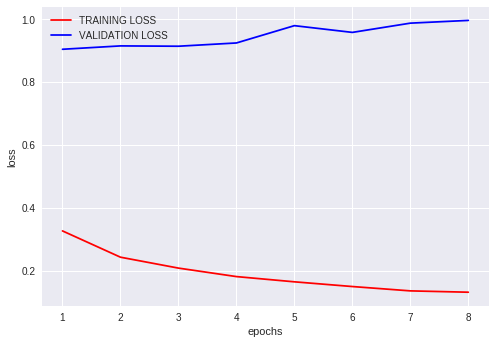

In [0]:
plt.clf()
plt.plot(epochs, loss, 'r', label="TRAINING LOSS")
plt.plot(epochs, val_loss, 'b', label="VALIDATION LOSS")
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [0]:
results = model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 151us/step


In [0]:
results

[1.1369491778413632, 0.786731967996086]